### Import all the libraries

In [71]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns


In [72]:
df=pd.read_csv('crime_data.csv')

In [73]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA


In [74]:
# Rename the unnamed column as City
df = df.rename(columns={'Unnamed: 0': 'City'})

In [75]:
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [76]:
#normalising the data
#transforming each feature such that it has a mean of zero and a standard deviation of one.
# Select the features to scale
X = df[['Murder', 'Assault', 'UrbanPop','Rape']]

# Normalize the data
X_scaled = (X - X.min()) / (X.max() - X.min())

In [77]:
X_scaled

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


<function matplotlib.pyplot.show(close=None, block=None)>

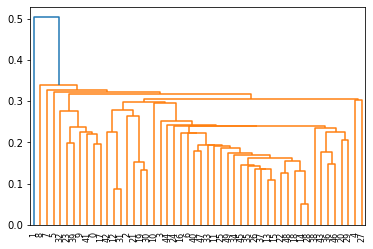

<Figure size 720x648 with 0 Axes>

In [78]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.figure(figsize=(10, 9))
plt.show

In [79]:
hc=AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage= 'single')
hc

AgglomerativeClustering(linkage='single')

In [80]:
#saving clusters
y_hc=hc.fit_predict(X_scaled)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
df['y_hc']=y_hc

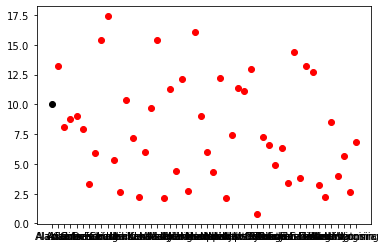

In [85]:
plt.scatter(df[df["y_hc"]==1].iloc[:,0],df[df["y_hc"]==1].iloc[:,1],color="black")
plt.scatter(df[df["y_hc"]==0].iloc[:,0],df[df["y_hc"]==0].iloc[:,1],color="red")

plt.show()

In [86]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
df['hclusters']= clusters

In [13]:
df

,City,Murder,Assault,UrbanPop,Rape,hclusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [14]:
df[df['hclusters']==1]

,City,Murder,Assault,UrbanPop,Rape,hclusters
7,Delaware,5.9,238,72,15.8,1


In [15]:
df[df['hclusters']==2]

,City,Murder,Assault,UrbanPop,Rape,hclusters
8,Florida,15.4,335,80,31.9,2


In [16]:
df[df['hclusters']==3]

,City,Murder,Assault,UrbanPop,Rape,hclusters
1,Alaska,10.0,263,48,44.5,3


In [17]:
df[df['hclusters']==0]

,City,Murder,Assault,UrbanPop,Rape,hclusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
12,Illinois,10.4,249,83,24.0,0


### implementing KMeans clustering

### Finding optimum number of cluster using wcss and elbow chart

In [18]:
wcss=[]

for i in range (1,11):
    Kmeans= KMeans(n_clusters=i, random_state=12)
    Kmeans.fit(X_scaled)
    wcss.append(Kmeans.inertia_)

C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
wcss

[13.184122550256447,
 6.596893867946197,
 5.010878493006419,
 3.6834561535859134,
 3.184261813967723,
 2.8706843119018353,
 2.539649153417607,
 2.37151740700789,
 2.107333122299498,
 1.8857777662081803]

### There isn't much change after the 2nd value. We can set K=2

### Lets plot the elbow graph

<function matplotlib.pyplot.show(close=None, block=None)>

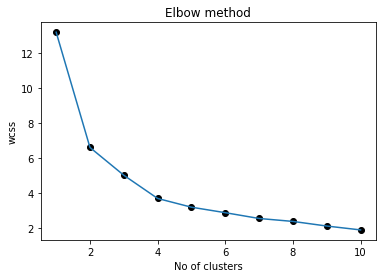

In [20]:
plt.plot(range (1,11), wcss)
plt.scatter(range (1,11), wcss, color='black')
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show

In [21]:
#validating the Kvalue(optimal clusters) using silhouette score

from sklearn.metrics import silhouette_score as sil

from sklearn.cluster import KMeans

In [22]:
nc=[2,3,4,5,6,7,8,9,10]
iner=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(X_scaled.iloc[:,:4])
    iner.append(sil(X_scaled.iloc[:,:4],y))

<function matplotlib.pyplot.show(close=None, block=None)>

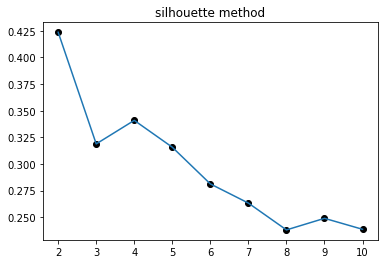

In [23]:
plt.plot(nc, iner)
plt.scatter(nc, iner, color='black')
plt.title("silhouette method")
plt.show

### Silhoutte score says 2 clusters but previously we saw from Elbow graph that K value being same as 2. 
### Lets check with calinski_harabaz score

In [24]:
from sklearn.metrics import calinski_harabasz_score as chs


In [25]:
nc=[2,3,4,5,6,7,8,9,10]
iner=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(X_scaled.iloc[:,:4])
    iner.append(chs(X_scaled.iloc[:,:4],y))

<function matplotlib.pyplot.show(close=None, block=None)>

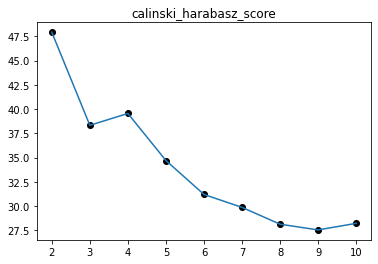

In [26]:
plt.plot(nc, iner)
plt.scatter(nc, iner, color='black')
plt.title("calinski_harabasz_score")
plt.show

In [27]:
#calinski_harabasz_score also says the same. Therefore we can select cluster =2

In [28]:
cluster_new= KMeans(n_clusters=2, random_state=12)

In [29]:
cluster_new.fit(X_scaled)

KMeans(n_clusters=2, random_state=12)

In [30]:
cluster_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
df['KMeans_clusters']= cluster_new.labels_

In [32]:
df

,City,Murder,Assault,UrbanPop,Rape,hclusters,KMeans_clusters
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,1


In [33]:
df.groupby('KMeans_clusters').agg(['mean'])

C:\Users\G Govardhan Reddy\AppData\Local\Temp\ipykernel_22516\613139942.py:1: FutureWarning: ['City'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('KMeans_clusters').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,hclusters
,mean,mean,mean,mean,mean
KMeans_clusters,,,,,
0,4.870,114.433333,63.633333,15.943333,0.033333
1,12.165,255.250000,68.400000,29.165000,0.250000


In [34]:
#We can see that cluster 1 has the highest murder, assault, UrbanPop and Rape. 
# cluster 0 has the lowest Murder, Assault and Rape crime. But the UrbanPop is also low. 

In [35]:
#performing DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [90]:
df.drop(['City'],axis=1,inplace=True)

C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

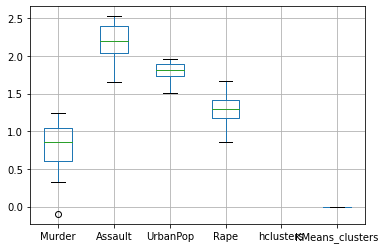

In [42]:
df.apply(np.log10).boxplot()

In [45]:
df

,Murder,Assault,UrbanPop,Rape,hclusters,KMeans_clusters
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,3,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,1


In [96]:
dbs=DBSCAN(min_samples=2,eps=0.4)
class_pr=dbs.fit_predict(df)

In [97]:
df["class_pr"]=class_pr

In [98]:
df

,Murder,Assault,UrbanPop,Rape,y_hc,class_pr
0,13.2,236,58,21.2,0,-1
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,0,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,0,-1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,0,-1


In [99]:
set(class_pr)

{-1}

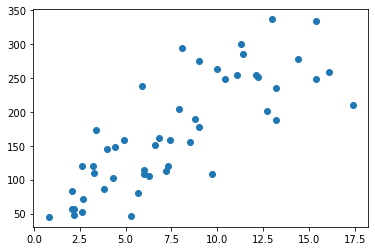

In [100]:
for i in set(class_pr):
    plt.scatter(df[df["class_pr"]==i].iloc[:,0],df[df["class_pr"]==i].iloc[:,1])

In [101]:
#There isn't any outlier and the DBSCAN isn't efficient for this dataset.